In [1]:
#Unsupervised learning 
#Clustering 
#1. K-means Clsutering Algorithm 
#k means no. of clusters , means how many pattern in given dataset 
#use dataset mall.csv
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

In [2]:
#load data
df=pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
#create a new dataframe which will hold Annual Income and Spending Score
df_new=df[['Annual Income (k$)', 'Spending Score (1-100)']]
#df.iloc[:,3:]

In [5]:
#apply scaling
from sklearn.preprocessing import StandardScaler
#create object of standardscaler
ss=StandardScaler()
X=ss.fit_transform(df_new)
type(df_new)

pandas.core.frame.DataFrame

In [6]:
df_new.isnull().sum()

Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [8]:
df_new.duplicated().sum()

4

In [9]:
df_new.drop_duplicates(inplace=True)

In [10]:
x=df_new.copy()
x

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [11]:
#apply scaling
from sklearn.preprocessing import StandardScaler
#create object of standardscaler
ss=StandardScaler()
x=ss.fit_transform(x)
print(type(x),x.ndim)

<class 'numpy.ndarray'> 2


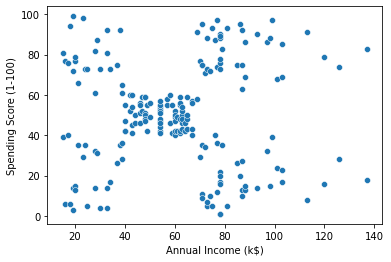

In [12]:
sns.scatterplot(data=df,x='Annual Income (k$)',y='Spending Score (1-100)')
plt.show()

In [13]:
#find how many cluster means k in given dataset
from sklearn.cluster import KMeans

In [14]:
#use Elbow, with the help of Elbow method we find the no. of cluster
#suppose total 20 cluster
k_rng=range(1,21)
#declare empty list for sum of squared error
SSE=[] #declare empty list
k_cluster=[] ##declare empty list of value of k

for k in k_rng:
    #create object of KMeans
    km=KMeans(n_clusters=k,random_state=1)
    #n_cluster inbuilt parameter, first take k=1 next k=2 
    #train the model using inbuild ,method
    km.fit(x)
    #check sum of squared error use inbuild method inertia_   which define in KMeans 
    #formula of SSE =sum(centerpoint-datapoints)^2
    #to add inertia for each value of k
    SSE.append(km.inertia_)
    #to add values of k in k_cluser
    k_cluster.append(k)

In [15]:
#create a dictionary
dict={'k':k_cluster,'SSE':SSE}
#convert dict into dataframe
df1=pd.DataFrame(dict)
df1

,k,SSE
0,1,392.000000
1,2,263.560266
2,3,155.778347
3,4,106.856558
4,5,63.500237
5,6,53.393998
6,7,43.533217
7,8,36.358244
8,9,31.504725
9,10,29.300007


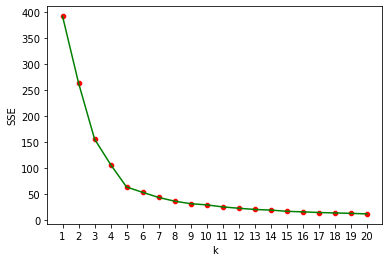

In [16]:
sns.scatterplot(data=df1,x='k',y='SSE',color='red')
sns.lineplot(data=df1,x='k',y='SSE',color='green')
plt.xticks(k_rng)
plt.show()

In [39]:
#clearly understood, no. of cluster in given dataset k=5
#create object of KMeans class
km=KMeans(n_clusters=4,random_state=1)


In [40]:
#train and predict, use inbuild method fit_predict() of kmeans class
y_pred=km.fit_predict(x)

In [41]:
#to add new cloumn in existing dataframe of 
df_new['Target']=y_pred
#df.head(10)

#create object of STandard Scaler
df_new['Annual Income (k$)']=ss.fit_transform(df_new[['Annual Income (k$)']])
df_new['Spending Score (1-100)']=ss.fit_transform(df_new[['Spending Score (1-100)']])

In [42]:
#create 5 dataset because we have 5 cluster
df0=df_new[df_new['Target']==0]
df1=df_new[df_new['Target']==1]
df2=df_new[df_new['Target']==2]
df3=df_new[df_new['Target']==3]
#df4=df_new[df_new['Target']==4]



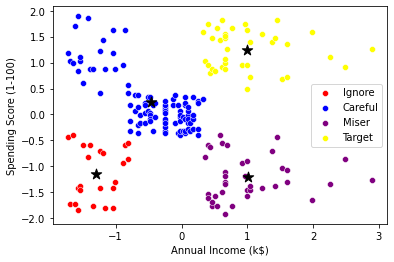

In [45]:
sns.scatterplot(data=df0, x='Annual Income (k$)', y='Spending Score (1-100)', color='red', label='Ignore')
sns.scatterplot(data=df1, x='Annual Income (k$)', y='Spending Score (1-100)', color='blue', label='Careful')
sns.scatterplot(data=df2, x='Annual Income (k$)', y='Spending Score (1-100)', color='purple', label='Miser')
sns.scatterplot(data=df3, x='Annual Income (k$)', y='Spending Score (1-100)', color='yellow', label='Target')
#sns.scatterplot(data=df4, x='Annual Income (k$)', y='Spending Score (1-100)', color='green', label='Miser')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], c='black', s=120, marker='*')
# : this means all rows and 0 and 1 are the columns
plt.show()

In [44]:
#to check centroid for each cluster, use inbuilt method cluster_centres_
print(km.cluster_centers_)

[[-1.30010194 -1.14400925]
 [-0.4641737   0.24432074]
 [ 1.01090332 -1.21422265]
 [ 0.99968276  1.24460574]]
